# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
The output is a binary categorical variable, i.e. discrete:
* 1 - The student needs early invervention
* 0 - The student doesn't need early intervention

So this is a **Classification** Problem

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print("Student data read successfully!")

Student data read successfully!


In [2]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# Calculate number of students
n_students = student_data.shape[0]

# Calculate number of features
n_features = student_data.shape[1] - 1 # Excluding the target variable

# Calculate passing students
n_passed = np.sum(student_data.passed == 'yes')

# Calculate failing students
n_failed = np.sum(student_data.passed == 'no')

# Calculate graduation rate
grad_rate = (n_passed/n_students)*100

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Further Exploration

Atributes Information. Fonte:
[Machine Learning Repository - UCI](https://archive.ics.uci.edu/ml/datasets/student+performance)

- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
- 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
- 3 age - student's age (numeric: from 15 to 22) 
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or - police), 'at_home' or 'other') 
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
- 13 traveltime - home to school travel time - (numeric: 1 - 0 to 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 more than 1 hour) 
- 14 studytime - weekly study time (numeric: 1 - less than 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - more than 10 hours) 
- 15 failures - number of past class failures (numeric: n if 1 <= n < 3, else 4) 
- 16 schoolsup - extra educational support (binary: yes or no) 
- 17 famsup - family educational support (binary: yes or no) 
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
- 19 activities - extra-curricular activities (binary: yes or no) 
- 20 nursery - attended nursery school (binary: yes or no) 
- 21 higher - wants to take higher education (binary: yes or no) 
- 22 internet - Internet access at home (binary: yes or no) 
- 23 romantic - with a romantic relationship (binary: yes or no) 
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
- 30 absences - number of school absences (numeric: from 0 to 93) 

#### Let's verify if the atributes in the data match the ones described in the repository above

In [5]:
from pprint import pprint

range_of_values = {}

for attr in feature_cols:
    range_of_values[attr] = sorted(student_data[attr].unique())
    
pprint(range_of_values)

{'Dalc': [1, 2, 3, 4, 5],
 'Fedu': [0, 1, 2, 3, 4],
 'Fjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Medu': [0, 1, 2, 3, 4],
 'Mjob': ['at_home', 'health', 'other', 'services', 'teacher'],
 'Pstatus': ['A', 'T'],
 'Walc': [1, 2, 3, 4, 5],
 'absences': [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              28,
              30,
              38,
              40,
              54,
              56,
              75],
 'activities': ['no', 'yes'],
 'address': ['R', 'U'],
 'age': [15, 16, 17, 18, 19, 20, 21, 22],
 'failures': [0, 1, 2, 3],
 'famrel': [1, 2, 

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [6]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [7]:
X_all.head()

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,0,1,0,18,0,1,1,0,1,...,1,0,0,4,3,4,1,1,3,6
1,1,0,1,0,17,0,1,1,0,0,...,1,1,0,5,3,3,1,1,3,4
2,1,0,1,0,15,0,1,0,1,0,...,1,1,0,4,3,2,2,3,3,10
3,1,0,1,0,15,0,1,1,0,0,...,1,1,1,3,2,2,1,1,5,2
4,1,0,1,0,16,0,1,1,0,0,...,1,0,0,4,3,2,1,2,5,4


### Feature Scaling

Standardization of datasets is a common requirement for many machine learning estimators, Logistic Regression and Support Vector Machine for instance are not scale invariant, so it is highly recommended to scale our data. Since our data consists exclusively of binary variables - after the preprocessing and generation of dummy variables - it makes no sense to  standardize it, so we are not going to do that.

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points above
# Added stratification to deal with unbalanced dataset 
X_train, X_test, y_train, y_test = train_test_split(X_all, 
                                                    y_all, 
                                                    test_size=num_test, 
                                                    random_state=42, 
                                                    stratify=y_all)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

1. **Logistic Regression**

  * Logistic Regression is one of the most applied algorithms in industry:
  > Logistic regression is used in weather forecasting, for example, to not
only predict if it will rain on a particular day but also to report the chance of rain.
Similarly, logistic regression can be used to predict the chance that a patient has a
particular disease given certain symptoms, which is why logistic regression enjoys
wide popularity in the field of medicine.
  > <cite>[1]</cite>
    
  * **Strengths:**   
    * Very easy to implement 
    * Easily updated, which is attractive when working with streaming data.  
        
  * **Weaknesses:**
    * It requires much more data to achieve stable, meaningful results.
    * Since it tries to maximize the conditional likelihood of the target given the training data, it's more prone to outliers than SVMs.
        
  * **Justification for choosing the model**:
     
    * Even knowing befohand that we don't actually have a set of independent variables ( features ), since a lot of them are correlated to each other, the use of logistic regression model seemed reasonable since it works very well in classification problems and it's simple enough to try at first ( Occam's Razor ). It's always possible to make further optimizations in real problems -- such as Dimensionality Reduction to deal with covariant features -- if necessary or apply more complex models.   
  
2. **Random Forests**:
  
  * **Applications**:
    
    * It's used in financial institutions to predict loyal/fraudulent customers.
    * **Pharmacology**: It's used in pharmacology to validade the correct combination of components in drug analysis<cite>[2]</cite>
    * **E-Commerce**: Decision Trees are widely used in e-commerce. It's used to generate online catalog, which is essential for the success of an e-commerce web site.<cite>[3]</cite>
    * **Medicine**: It's used in medicine as a helper in diagnostics given the medical record of the patient.<cite>[4]</cite>
    * It was used in Microsoft's XBox Kinnect tool to identify player's body parts.<cite>[5]</cite>
    
  * **Strengths**: 
  
    * It can be used for both Classification and Regression
    * It handles missing values and maintains accuracy for missing data   
    * It handles large data set with higher dimensionality
    * We don't have to worry so much about choosing hyperparameters values 
    * We typically don't need to prune the random forest since the ensemble is quite robust to noise from the individual tree.<cite>[1]</cite>
    
  * **Weaknessess**:
  
    * Good Job at Classification but not as good as for Regression, because it doesn't give a precise and continuous nature of prediction, i.e, it doesn't generalize well beyond the training data.
    * May overfit particularly noisy data.
    * You have very little control on what the model does. It has a black-box approach
    
  * **Justification for Using the Model**:
    
    * After the preprocessing, we have a big number of binary features, so it makes sense to use a Binary Decision Tree. But Random Forest was chosen instead of just a Decision Tree because of the strengths enumerated above, mainly to prevent overfitting because of the higher number of features.  
  
3. **Support Vector Machines**  
  * **Applications**: <cite>[6]</cite>
    
     * Text Categorisation
     * Image Recognition
     * Aspect Independent Classification
     * Colour-Based Classification
     * Hand-written Digit Recognition
     * Bioinformatics
     * Protein Homology Detection
     * Gene Expression      
       
  * **Strengths**: 
    
    * It converges even if the data is non-linearly separable.
    * Performs non-linear classification problems using the kernel trick
    * It's effective in high dimensional spaces
    * We can use different kernels or combinations of kernels and have more complex separating hyperplanes
    * Are not affected by local minima
    * Do not suffer from the curse of dimensionality
    
  * **Weaknesses**:
    
    * Poor performance when #features > # samples.
    * SVMs do not provide probability estimates
    
  * **Justification for Using the Model**: It may be the case that the classes in the independent variable are not linearly separable or not even linear in the first place. So it's natural to use a SVM with a non-linear kernel to prevent underfitting. SVMs are robust and a more complex tool to apply so we have a good balance between a simpicity ( Logistic Regression ) and complexity.
  
  
[1]: Raschka, Sebastian. Python Machine Learning. Birmingham: Packt Publishing,2015.<br>
[2]: K.T. DAGO, R. LUTHRINGER, R. LENGELLE, G. RINAUDO, AND J. P. MATCHER. Statistical decision tree: A tool for studying pharmaco-EEG effects of CNS-active drugs. Neuropsychobiology, 29(2):91--96, 1994.<br> 
[3]: K.J.Hunt,  “Classification  by  Induction:  Applications  to  Modeling  and  Control  of  Non-Linear Dynamic  Systems”, Intelligent  Systems Engineering, 2(4):231--245, 1993<br>
[4]: IGOR KONONENKO. Inductive and bayesian learning in medical diagnosis. Applied Artificial Intelligence, 7(4):317--337, October-December 1993.<br> 
[5]: Shotton, Jamie et al. Real-Time Human Pose Recognition in Parts from a Single Depth Image. June 1, 2011. Avaiable in [Microsoft Research Cambridge & Xbox Incubation](https://www.microsoft.com/en-us/research/publication/real-time-human-pose-recognition-in-parts-from-a-single-depth-image/?from=http%3A%2F%2Fresearch.microsoft.com%2Fpubs%2F145347%2Fbodypartrecognition.pdf)<br>
[6]: CRISTIANINI, Nello, and John SHAWE-TAYLOR, 2000. An Introduction to Support Vector Machines and Other Kernel-Based Learning Methods. Cambridge, UK: Cambridge University Press.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [9]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("\nTraining a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("\nF1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("\nF1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [10]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC


# Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = SVC(random_state=42)

for clf in [clf_A, clf_B, clf_C]:
    for size in [100, 200, 300]:
        train_predict(clf, X_train[:size], y_train[:size], X_test, y_test)
    print('='*80)



Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0053 seconds
Made predictions in 0.0020 seconds.

F1 score for training set: 0.8671.
Made predictions in 0.0004 seconds.

F1 score for test set: 0.7068.

Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0042 seconds
Made predictions in 0.0004 seconds.

F1 score for training set: 0.8211.
Made predictions in 0.0004 seconds.

F1 score for test set: 0.7391.

Training a LogisticRegression using a training set size of 300. . .
Trained model in 0.0056 seconds
Made predictions in 0.0005 seconds.

F1 score for training set: 0.8512.
Made predictions in 0.0005 seconds.

F1 score for test set: 0.7500.

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0229 seconds
Made predictions in 0.0028 seconds.

F1 score for training set: 0.9924.
Made predictions in 0.0022 seconds.

F1 score for test set: 0.7368.

Training a RandomForestClassifi

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Logistic Regression**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0053           |        0.0004          |   0.8671         |   0.7068        |
| 200               |        0.0042           |        0.0004          |   0.8211         |   0.7391        |
| 300               |        0.0056           |        0.0005          |   0.8512         |   0.7500        |

** Classifer 2 - Random Forest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0229              |        0.0022          |     0.9924       |    0.7368       |
| 200               |     0.0231              |        0.0037          |     0.9885       |    0.6822       |
| 300               |     0.0376              |        0.0035          |     0.9975       |    0.7132       |

** Classifer 3 - Support Vector Machines**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0034               |      0.0023            |    0.8354        |    0.8025       |
| 200               |    0.0093               |      0.0041            |    0.8431        |    0.8105       |
| 300               |    0.0174               |      0.0036            |    0.8664        |    0.8052       |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** **Support Vector Machines**
* The logistic regression model is a lot simpler and more intuitive than Random Forests and Support Vector Machines, but SVM had the best test scores on the three data sets and it's above 0.8, which is considered a good threshold. 
* The prediction times in SVM is one order of magnitude higher than LR and about the same as Random Forests but it's still on the order of $\frac{1}{1000}$ of a second.
* By analysing the relationship between the training and the testing score in Random Forests, it seems to be overfitting.  

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

1. **Question**: In our data we have a bunch of features from the students but we don't have a clear way of discriminating how these features determine the information we are interested in: If the student **passed or failed**

2. **How the Model makes a prediction**: If we had only two features for each student, $X_1$ and $X_2$, we could plot the values in a graphic like this: ![SVM.png](SVM.png)

 The points in **<span style="color:green">green</span>** could be the students who *passed* and the points in **  <span style="color:red">red</span>** the students who *failed*.

 The model classify the students by tracing a *line* which maximizes the distance between the points closer to the    border.

 Given that we have a lot more than 2 features, we can't visualize this *line* in more dimensions, but the model works in the same way. 
 
3. **How we measure how good our model is**: Since we know for each student who passed or failed, we check the # of correct predictions given by our model.

4. **How to improve the model:** We alter some internal parameters of the model, repeat steps 2 and 3 and check if the hits ( correct predictions ) improved until the improvement is too small compared to the previous step, then we stop.   

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

### Alternative Tuning:
* Perform further splitting on train data with Stratified Shuffle Split
* Fit Randomized Grid Search instead on training data using the same scoring method and store in `rand_grid_obj`

In [11]:
# SVM Parameters
clf_C.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': None,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [12]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

# 
C_range = np.logspace(0, 15, base=2)

gamma_range = np.logspace(-9, 3, base=2)

class_weight = ['balanced', None]

# Create dict of parameters
parameters = {'C': C_range,
              'gamma': gamma_range,
              'class_weight': class_weight,
             }
              

clf = SVC(random_state=42,          
          cache_size=1000,
          kernel='rbf')          

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, n_jobs=-1)


# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)


# Get the estimators
clf = grid_obj.best_estimator_

# Report the best parameters found
print("Best parameters set found using Grid Search on training set:")
print()
print(grid_obj.best_params_)
print()

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

Best parameters set found using Grid Search on training set:

{'C': 1.236380194440728, 'class_weight': None, 'gamma': 0.024920371535525433}

Made predictions in 0.0098 seconds.
Tuned model has a training F1 score of 0.8993.
Made predictions in 0.0032 seconds.
Tuned model has a testing F1 score of 0.8158.


### Confusion Matrix

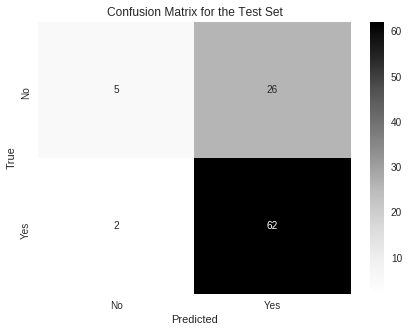

In [13]:
import seaborn as sns # Install using 'pip install seaborn'
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)

_ = plt.figure(figsize=(7,5))
_ = sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
_ = plt.title('Confusion Matrix for the Test Set')
_ = plt.ylabel('True')
_ = plt.xlabel('Predicted')
_ = plt.show()

In [14]:
(tn, fp, fn, tp) = cm_test.ravel()
total = sum((tn, fp, fn, tp))

print("Accuracy: {:.4f}".format((tp + tn)/total))
print("True Positive Rate: {:.4f}".format(tp/(tp+fn)))
print("False Positive Rate: {:.4f}".format(fp/(fp+tn)))
print("Specificity: {:.4f}".format(tn/(fp+tn)))
print("Precision: {:.4f}".format(tp/(fp+tp)))
print("Prevalence: {:.4f}".format((tp + fn)/total))

Accuracy: 0.7053
True Positive Rate: 0.9688
False Positive Rate: 0.8387
Specificity: 0.1613
Precision: 0.7045
Prevalence: 0.6737


### Randomized Grid Search with Stratified Shuffle Splitting

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

def randomized_tuning(X, y, clf, parameters, scoring):
    """ Performs Randomized grid search over the clf parameters using the 
    score function scorer provided on the input data [X, y]. """
    
    # Create a Stratified Split
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)    
    

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = RandomizedSearchCV(clf, parameters, scoring=scoring, cv=sss, n_jobs=-1, random_state=42, error_score=0)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid

In [16]:
from scipy.stats import expon

# Set seed for scipy
np.random.seed(42)

parameters = {'C': expon(scale=100), 'gamma': expon(scale=.1), 
              'class_weight':['balanced', None]
             }


clf = SVC(random_state=42,          
          cache_size=1000,
          kernel='rbf')
             

# Fit Randomized Grid Search on the classifier using the f1-scorer and Stratified Shuffle Split
rand_grid_obj = randomized_tuning(X_train, y_train, clf, parameters, f1_scorer)

clf_rand = rand_grid_obj.best_estimator_

print("Best parameters set found using Randomized Grid Search and Stratified Random Suffle Split on training set:")
print()
print(rand_grid_obj.best_params_)
print()

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf_rand, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf_rand, X_test, y_test)))

Best parameters set found using Randomized Grid Search and Stratified Random Suffle Split on training set:

{'C': 40.602818331379076, 'class_weight': None, 'gamma': 0.12312500617045903}

Made predictions in 0.0123 seconds.
Tuned model has a training F1 score of 1.0000.
Made predictions in 0.0042 seconds.
Tuned model has a testing F1 score of 0.8258.


### Confusion Matrix for the Alternative Tuned Model

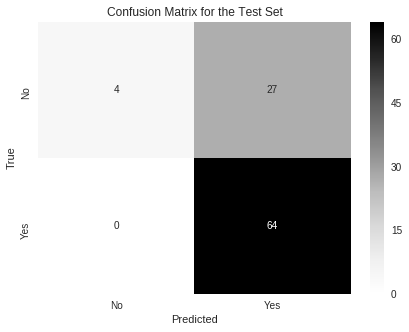

In [17]:
clf_rand = clf_rand.fit(X_train, y_train)

y_pred = clf_rand.predict(X_test)

cm_test = confusion_matrix(y_test, y_pred)

_ = plt.figure(figsize=(7,5))
_ = sns.heatmap(cm_test, annot=True, cmap='Greys', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
_ = plt.title('Confusion Matrix for the Test Set')
_ = plt.ylabel('True')
_ = plt.xlabel('Predicted')

In [18]:
(tn, fp, fn, tp) = cm_test.ravel()
total = sum((tn, fp, fn, tp))

print("Accuracy: {:.4f}".format((tp + tn)/total))
print("True Positive Rate: {:.4f}".format(tp/(tp+fn)))
print("False Positive Rate: {:.4f}".format(fp/(fp+tn)))
print("Specificity: {:.4f}".format(tn/(fp+tn)))
print("Precision: {:.4f}".format(tp/(fp+tp)))
print("Prevalence: {:.4f}".format((tp + fn)/total))


Accuracy: 0.7158
True Positive Rate: 1.0000
False Positive Rate: 0.8710
Specificity: 0.1290
Precision: 0.7033
Prevalence: 0.6737


The alternative tuned model improved the test score but the perfect training score shows overfitting. So our final model is the first one, tuned with the normal Grid Search. 

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **


  **$F_{1}$ Score**   
                 
|   Model       |   Training   |   Testing    |
|:-------------:|:------------:|:------------:|
| Untuned Model | 0.8664 | 0.8052 |
| Final Model   | 0.8993 | 0.8158 |



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.